In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint
from scipy.optimize import fmin_tnc, differential_evolution
from scipy.special import gamma
from scipy.signal import fftconvolve

from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 15)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 15)
plt.rc('lines', lw = 0.5, markersize = 20)
plt.rc('legend', fontsize = 10)


*DATA SET 01/31/2023*: **Time-Resolved Photoluminesence**

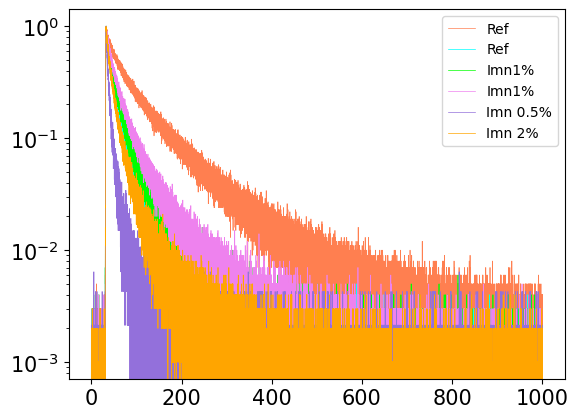

In [3]:
JTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/01:31:2023/Julisa_series.csv', names=['Time', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6'],delimiter=',',index_col=False)
MTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/01:31:2023/Margherita_series.csv', names=['Time', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6'],delimiter=',',index_col=False)
JTRPL_bi = JTRPL.dropna( inplace=False)
#for loop data through a graph
colors = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']

C = ['Ref','Ref','Imn1%','Imn1%','Imn 0.5%', 'Imn 2%']
for i in range(1,7):
    plt.plot(JTRPL_bi['Time'].values, JTRPL_bi['Count'+str(i)].values/np.max(JTRPL_bi['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
    plt.yscale('log')
plt.legend()


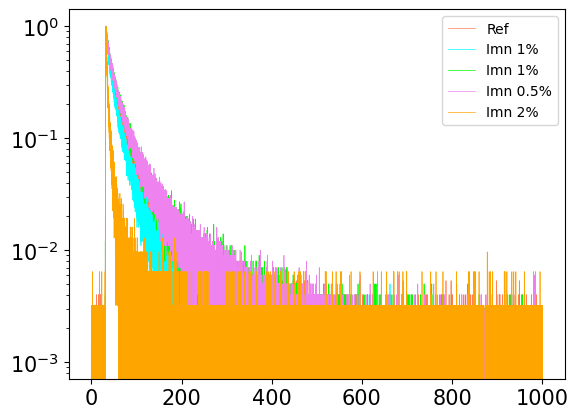

In [4]:
MTRPL_bi = MTRPL.dropna( inplace=False)

colors = ['coral','cyan','lime','violet', 'orange']
C = ['Ref','Imn 1%','Imn 1%','Imn 0.5%','Imn 2%']
for i in range(1,6):
    plt.plot(MTRPL_bi['Time'].values, MTRPL_bi['Count'+str(i)].values/np.max(MTRPL_bi['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
    plt.yscale('log')
plt.legend()

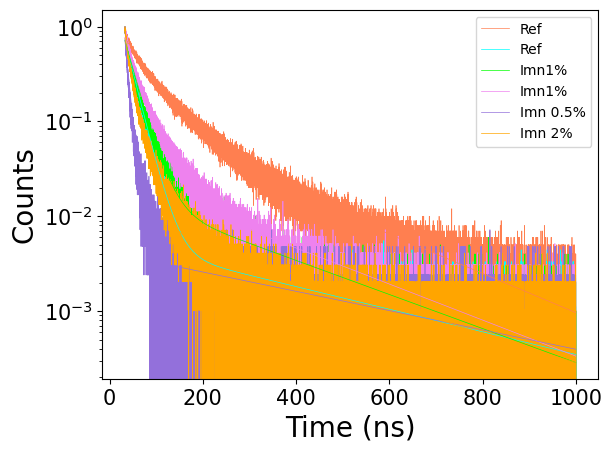

[68.55432549285342, 22.56190931385567, 26.03222817063882, 32.12716278783781, 8.85801153328767, 18.325405097737562]


In [5]:
JTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/01:31:2023/Julisa_series.csv', names=['Time', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6'],skiprows = 10 , delimiter=',',index_col=False)
JTRPL_bi = JTRPL.dropna( inplace=False)
newtime = JTRPL_bi.iloc[:,0].astype(np.int64)
fixedJTRPL_bi = JTRPL_bi.drop(JTRPL_bi.index[range(JTRPL_bi['Count1'].idxmax())])
fixedJTRPL_bi.columns = ['newtime', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6']

Jtau1 = []
Jtau2 = []
Jtauavg = []
colors = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
colors2 = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
C = ['Ref','Ref','Imn1%','Imn1%','Imn 0.5%', 'Imn 2%']
for i in range(1,7):
    plt.plot(fixedJTRPL_bi['newtime'].values, fixedJTRPL_bi['Count'+str(i)].values/np.max(fixedJTRPL_bi['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,7):
    biexp_Count= double_exp_fit(fixedJTRPL_bi['Count'+str(i)].values/np.max(fixedJTRPL_bi['Count'+str(i)].values),fixedJTRPL_bi['newtime'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(fixedJTRPL_bi['newtime'].values, biexp_Count[5], colors2[i-1])
    plt.legend()
    Jtau1.append(biexp_Count[0])
    Jtau2.append(biexp_Count[2])
    Jtauavg.append(biexp_Count[4])
plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()
print(Jtauavg)


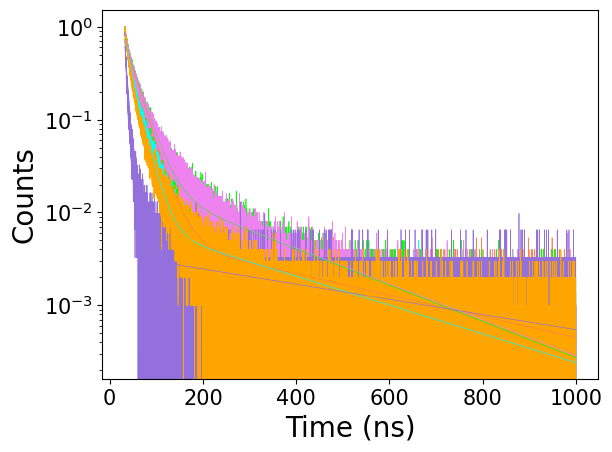

[27.572616761235516, 20.348110191316312, 28.25491024719847, 28.650988757309893, 6.4347084471657565, 16.961876797787294]


In [6]:
MTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/01:31:2023/Margherita_series.csv', names=['Time', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6'],delimiter=',',index_col=False)
MTRPL_bi = MTRPL.dropna( inplace=False)
newtime1 = MTRPL_bi.iloc[:,0].astype(np.int64)
fixedMTRPL_bi = MTRPL_bi.drop(MTRPL_bi.index[range(MTRPL_bi['Count1'].idxmax())])
fixedMTRPL_bi.columns = ['newtime1', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6']

Mtau1 = []
Mtau2 = []
Mtauavg = []
colors = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
colors2 = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
C = ['Ref','Ref','Imn1%','Imn1%','Imn 0.5%', 'Imn 2%']
for i in range(1,7):
    plt.plot(fixedMTRPL_bi['newtime1'].values, fixedMTRPL_bi['Count'+str(i)].values/np.max(fixedMTRPL_bi['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,7):
    biexp_Count= double_exp_fit(fixedMTRPL_bi['Count'+str(i)].values/np.max(fixedMTRPL_bi['Count'+str(i)].values),fixedMTRPL_bi['newtime1'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(fixedMTRPL_bi['newtime1'].values, biexp_Count[5], colors2[i-1])
    Mtau1.append(biexp_Count[0])
    Mtau2.append(biexp_Count[2])
    Mtauavg.append(biexp_Count[4])
plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()
print(Mtauavg)


/Users/julisajuarez/functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


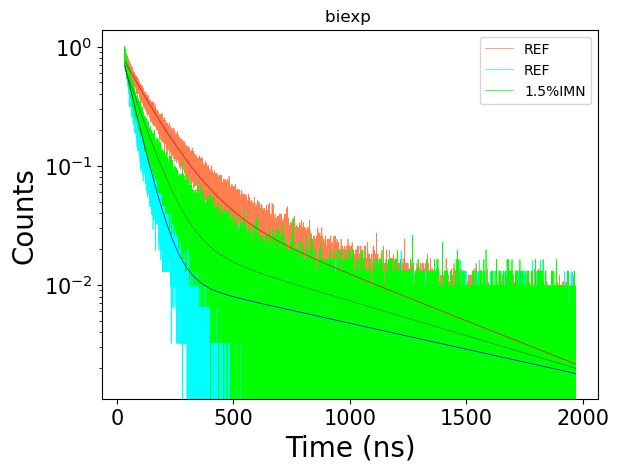

[148.26913036314934, 62.18366903100633, 92.24469574366047]


In [7]:
add_data= pd.read_csv('~/Desktop/TRPL:Lifetime Data/03_10_2023/500kHz_32ps_REF_REF_IMN1.5_1.2M_100%T_640nm_0-1970ns.txt', names=['Count1','Count2','Count3'],skiprows = 10, delimiter='	',index_col=False)
Timexx=pd.Series(np.arange(0,2000,0.032))
adding_data = pd.concat([Timexx,add_data], axis =1)
tratime = adding_data.iloc[:,0].astype(np.int64)
addTRPL = adding_data.drop(adding_data.index[range(adding_data['Count1'].idxmax())])
addingTRPL = addTRPL.dropna()
addingTRPL.columns = ['tratime', 'Count1','Count2','Count3'] 

mylist = []
colors = ['coral','cyan','lime']
colors2 = ['r','b','g']
C = ['REF','REF','1.5%IMN']

for i in range(1,4):
    plt.plot(addingTRPL['tratime'].values , addingTRPL['Count'+str(i)].values/np.max(addingTRPL['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,4):
    biexp_Count= double_exp_fit(addingTRPL['Count'+str(i)].values/np.max(addingTRPL['Count'+str(i)].values),addingTRPL['tratime'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(addingTRPL['tratime'].values, biexp_Count[5], colors2[i-1])
    mylist.append(biexp_Count[4])
    plt.legend()
    
plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.title(r"biexp ")
plt.show()

print(mylist)


In [8]:
#Best of Ref, 0.5%, 1%, 2% (and eventually 1.5%?)
tauavg_bestarray = np.array([[69.09135934623089, 22.472491457062034,27.36616416715846,20.405093447694306],[8.844222406684507,6.364280272681132,math.nan,math.nan],[25.98698225325592,32.096134063814,28.345709797131885,28.877470914285453],[91.62854464315942,math.nan,math.nan,math.nan],[18.341932082933074,16.92184828427166,math.nan,math.nan]])
tauavg_bestarray_df = pd.DataFrame(tauavg_bestarray, 
                            index = ['Control','IMN 0.5%', 'IMN 1%','IMN 1.5%', 'IMN2%'],
                            columns  = ['J','J','M','M'])
print(tauavg_bestarray_df)


                  J          J          M          M
Control   69.091359  22.472491  27.366164  20.405093
IMN 0.5%   8.844222   6.364280        NaN        NaN
IMN 1%    25.986982  32.096134  28.345710  28.877471
IMN 1.5%  91.628545        NaN        NaN        NaN
IMN2%     18.341932  16.921848        NaN        NaN


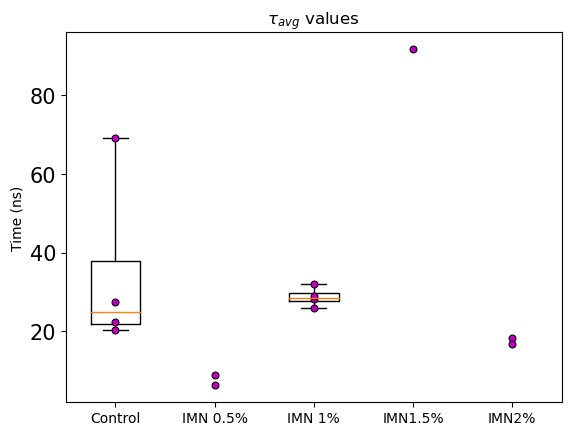

In [9]:
fig, ax = plt.subplots()
ax.boxplot(tauavg_bestarray.transpose(), whis=(0,100))
plt.plot([1,2,3,4,5],tauavg_bestarray, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(['Control','IMN 0.5%', 'IMN 1%','IMN1.5%', 'IMN2%'], fontsize = 10)
plt.title(r"$\tau_{avg}$ values")
plt.ylabel("Time (ns)")
plt.show()

       newtime  Count1  Count2  Count3  Count4  Count5  Count6
1018    32.896  1000.0   894.0   930.0   947.0   416.0   887.0
1019    32.928   933.0   875.0   902.0   916.0   410.0   975.0
1020    32.960   931.0   891.0   856.0   928.0   375.0   934.0
1021    32.992   982.0   889.0   918.0   952.0   415.0   966.0
1022    33.024   963.0   883.0   926.0   965.0   410.0   950.0
...        ...     ...     ...     ...     ...     ...     ...
31235  999.840     3.0     0.0     1.0     1.0     0.0     0.0
31236  999.872     1.0     0.0     0.0     0.0     0.0     1.0
31237  999.904     4.0     1.0     1.0     0.0     0.0     0.0
31238  999.936     2.0     1.0     0.0     2.0     0.0     0.0
31239  999.968     1.0     1.0     2.0     2.0     0.0     0.0

[30222 rows x 7 columns]


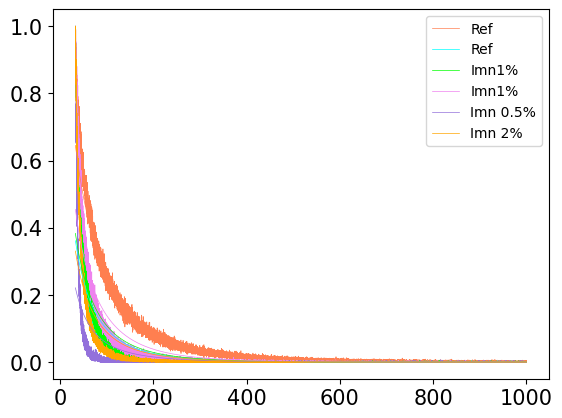

In [10]:
fixedJTRPL_bi = JTRPL_bi.drop(JTRPL_bi.index[range(JTRPL_bi['Count1'].idxmax())])
fixedJTRPL_bi.columns = ['newtime', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6']
print(fixedJTRPL_bi)
colors = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
colors2 = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
C = ['Ref','Ref','Imn1%','Imn1%','Imn 0.5%', 'Imn 2%']
for i in range(1,7):
    plt.plot(fixedJTRPL_bi['newtime'].values, fixedJTRPL_bi['Count'+str(i)].values/np.max(fixedJTRPL_bi['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,7):
    stretchexp_Count = stretch_exp_fit(fixedJTRPL_bi['Count'+str(i)].values/np.max(fixedJTRPL_bi['Count'+str(i)].values), fixedJTRPL_bi['newtime'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))
    plt.plot(fixedJTRPL_bi['newtime'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()
    

/Users/julisajuarez/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


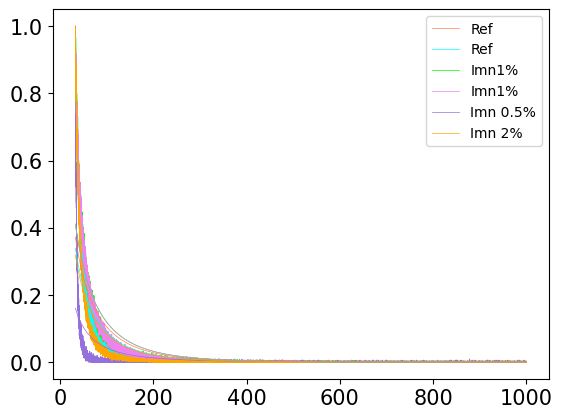

In [11]:
newtime1 = MTRPL_bi.iloc[:,0].astype(np.int64)
fixedMTRPL_bi = MTRPL_bi.drop(MTRPL_bi.index[range(MTRPL_bi['Count1'].idxmax())])
fixedMTRPL_bi.columns = ['newtime1', 'Count1','Count2','Count3','Count4', 'Count5', 'Count6']

colors = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
colors2 = ['coral','cyan','lime','violet', 'mediumpurple', 'orange']
C = ['Ref','Ref','Imn1%','Imn1%','Imn 0.5%', 'Imn 2%']
for i in range(1,7):
    plt.plot(fixedMTRPL_bi['newtime1'].values, fixedMTRPL_bi['Count'+str(i)].values/np.max(fixedMTRPL_bi['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,7):
    stretchexp_Count = stretch_exp_fit(fixedMTRPL_bi['Count'+str(i)].values/np.max(fixedMTRPL_bi['Count'+str(i)].values), fixedMTRPL_bi['newtime1'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))
    plt.plot(fixedMTRPL_bi['newtime1'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()
    

*DATA SET 01/31/2023*: **Lifetime**

*DATA SET 02/07/2023*: **TRPL**

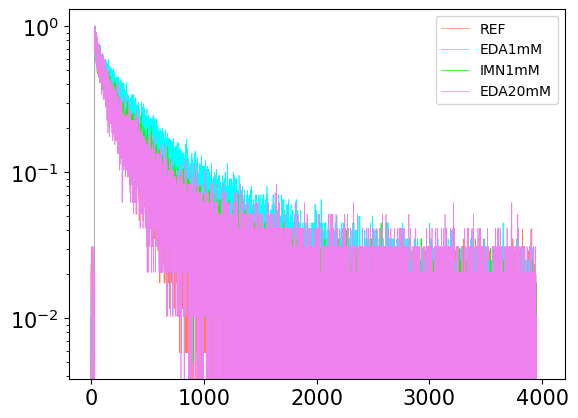

In [12]:
Timex=pd.Series(np.arange(0,4000,0.256)) #add the time scale by looking at the resolution and frequency of your measurement- for each pulse!! 1/250kHz
J1refTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/J1_ref_eda1mM_Imn1mM_eda20mM_250KHz_256ps_1pcint.txt',names=['Count1','Count2','Count3','Count4'], skiprows = 10 , delimiter='	',index_col=False)
#convert pandas --> np arrays!!! easier to work with
colors = ['coral','cyan','lime','violet']
C = ['REF','EDA1mM','IMN1mM','EDA20mM']
for i in range(1,5):
    plt.plot(Timex, J1refTRPL['Count'+str(i)].values/np.max(J1refTRPL['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
    plt.yscale('log')
plt.legend()


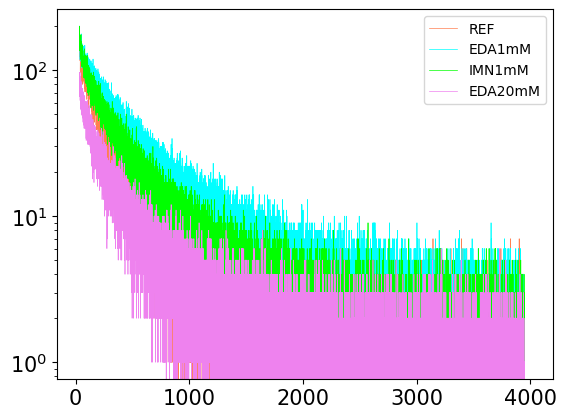

In [13]:
J1refTRPL1 = pd.concat([Timex,J1refTRPL], axis =1)
Time = J1refTRPL1.iloc[:,0].astype(np.int64) #calls and converts Timex from float to int
fixedJ1refTRPL1 = J1refTRPL1.drop(J1refTRPL1.index[range(J1refTRPL1['Count1'].idxmax())])
fixedJ1refTRPL1.columns = ['Time', 'Count1','Count2','Count3','Count4']

colors = ['coral','cyan','lime','violet']
C = ['REF','EDA1mM','IMN1mM','EDA20mM']
for i in range(1,5):
    plt.plot(fixedJ1refTRPL1['Time'], fixedJ1refTRPL1['Count'+str(i)].values, label = C[i-1], c= colors[i-1])
    plt.yscale('log')
plt.legend()



In [14]:
print(J1refTRPL1['Count1'].idxmax())   #index where max happens

130


In [15]:
print(fixedJ1refTRPL1)
print(np.shape(fixedJ1refTRPL1.values[:,1:]))

           Time  Count1  Count2  Count3  Count4
130      33.280     172     200     187      90
131      33.536     158     179     200      81
132      33.792     147     170     175      92
133      34.048     154     170     156      96
134      34.304     160     171     191      66
...         ...     ...     ...     ...     ...
15620  3998.720       0       0       0       0
15621  3998.976       0       0       0       0
15622  3999.232       0       0       0       0
15623  3999.488       0       0       0       0
15624  3999.744       0       0       0       0

[15495 rows x 5 columns]
(15495, 4)


**02/07/2023:** *Biexponential Fit*

/Users/julisajuarez/functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


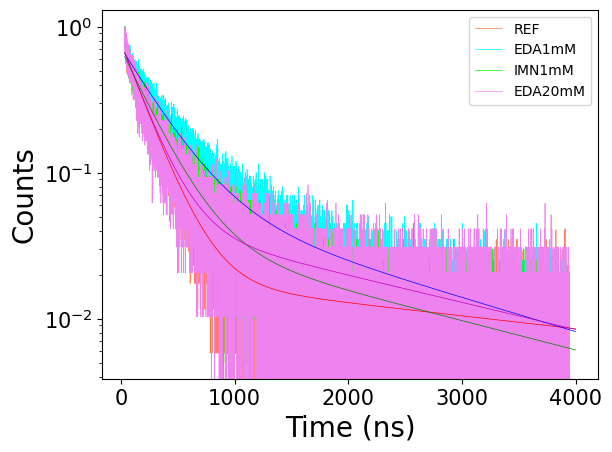

[325.9394406005955, 466.6910332399568, 360.2992226449395, 328.8788706365282]


In [16]:
J1refTRPL1 = pd.concat([Timex,J1refTRPL], axis =1)
Time = J1refTRPL1.iloc[:,0].astype(np.int64) #calls and converts Timex from float to int
fixedJ1refTRPL1 = J1refTRPL1.drop(J1refTRPL1.index[range(J1refTRPL1['Count1'].idxmax())])
fixedJ1refTRPL1.columns = ['Time', 'Count1','Count2','Count3','Count4']

J1tau1 = []
J1tau2 = []
J1tauavg = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','EDA1mM','IMN1mM','EDA20mM']
for i in range(1,5):
    plt.plot(fixedJ1refTRPL1['Time'].values , fixedJ1refTRPL1['Count'+str(i)].values/np.max(fixedJ1refTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    biexp_Count= double_exp_fit(fixedJ1refTRPL1['Count'+str(i)].values/np.max(fixedJ1refTRPL1['Count'+str(i)].values),fixedJ1refTRPL1['Time'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(fixedJ1refTRPL1['Time'].values, biexp_Count[5], colors2[i-1])
    plt.legend()
    J1tau1.append(biexp_Count[0]) #places values into a list 
    J1tau2.append(biexp_Count[2])
    J1tauavg.append(biexp_Count[4])
plt.yscale('log')
plt.xlabel('Time (ns)', fontsize =  20)
plt.ylabel('Counts', fontsize =  20)
plt.show()
print(J1tauavg)

In [17]:
#running this for all data, plot this for every decay, plot of the average lifetime for each decay
#same thing for the stretched exponential 

/Users/julisajuarez/functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


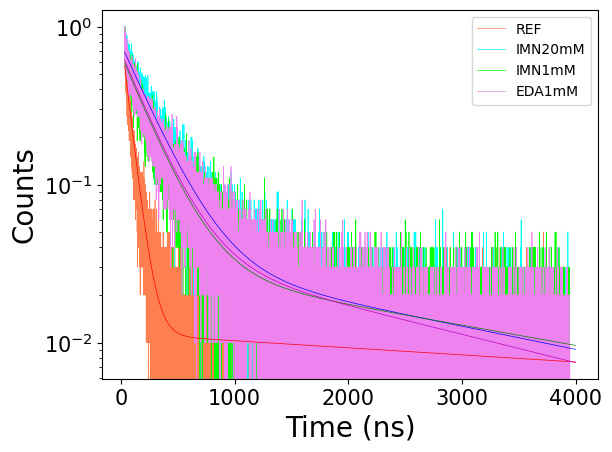

[191.89138616219043, 382.5331850352589, 390.44249042842654, 363.7166729942191]


In [18]:
J2refTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/J2_ref_imn20mM_Imn1mM_eda1mM_250KHz_256ps_1pcint.txt', names=['Count1','Count2','Count3','Count4'], skiprows = 10 ,delimiter='	',index_col=False)
J2refTRPL1 = pd.concat([Timex,J2refTRPL], axis =1)
Time1 = J2refTRPL1.iloc[:,0].astype(np.int64) 
fixedJ2refTRPL1 = J2refTRPL1.drop(J2refTRPL1.index[range(J2refTRPL1['Count1'].idxmax())])
fixedJ2refTRPL1.columns = ['Time1', 'Count1','Count2','Count3','Count4']   

J2tau1 = []
J2tau2 = []
J2tauavg = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','IMN20mM','IMN1mM','EDA1mM']
for i in range(1,5):
    plt.plot(fixedJ2refTRPL1['Time1'].values , fixedJ2refTRPL1['Count'+str(i)].values/np.max(fixedJ2refTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    biexp_Count= double_exp_fit(fixedJ2refTRPL1['Count'+str(i)].values/np.max(fixedJ2refTRPL1['Count'+str(i)].values),fixedJ2refTRPL1['Time1'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(fixedJ2refTRPL1['Time1'].values, biexp_Count[5], colors2[i-1])
    plt.legend()
    J2tau1.append(biexp_Count[0])
    J2tau2.append(biexp_Count[2])
    J2tauavg.append(biexp_Count[4])
plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()
print(J2tauavg)

/Users/julisajuarez/functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


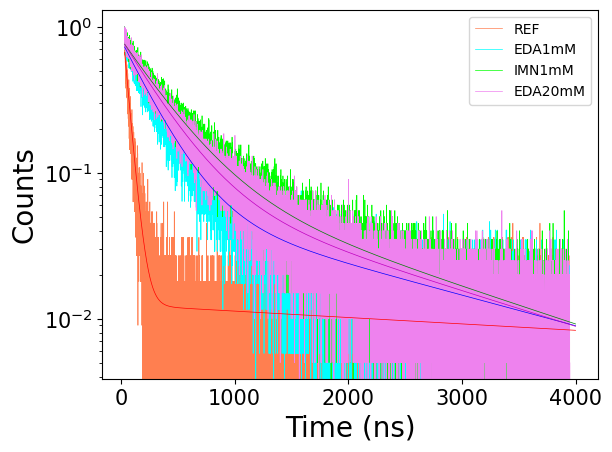

[142.93703622564252, 401.37647259157023, 511.7328905859863, 463.09893641885566]


In [19]:
M1refTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/M1_ref_eda1mM_Imn1mM_eda20mM_250KHz_256ps_1pcint.txt', names=['Count1','Count2','Count3','Count4'], skiprows = 10 ,delimiter='	',index_col=False)
M1refTRPL1 = pd.concat([Timex,M1refTRPL], axis =1)
Time2 = M1refTRPL1.iloc[:,0].astype(np.int64) 
fixedM1refTRPL1 = M1refTRPL1.drop(M1refTRPL1.index[range(M1refTRPL1['Count1'].idxmax())])
fixedM1refTRPL1.columns = ['Time2', 'Count1','Count2','Count3','Count4'] 

M1tau1 = []
M1tau2 = []
M1tauavg = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','EDA1mM','IMN1mM','EDA20mM']
for i in range(1,5):
    plt.plot(fixedM1refTRPL1['Time2'].values , fixedM1refTRPL1['Count'+str(i)].values/np.max(fixedM1refTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    biexp_Count= double_exp_fit(fixedM1refTRPL1['Count'+str(i)].values/np.max(fixedM1refTRPL1['Count'+str(i)].values),fixedM1refTRPL1['Time2'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(fixedM1refTRPL1['Time2'].values, biexp_Count[5], colors2[i-1])
    plt.legend()
    M1tau1.append(biexp_Count[0])
    M1tau2.append(biexp_Count[2])
    M1tauavg.append(biexp_Count[4])
plt.yscale('log')
plt.xlabel('Time (ns)', fontsize =  20)
plt.ylabel('Counts', fontsize =  20)
plt.show()
print(M1tauavg)

/Users/julisajuarez/functions.py:82: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


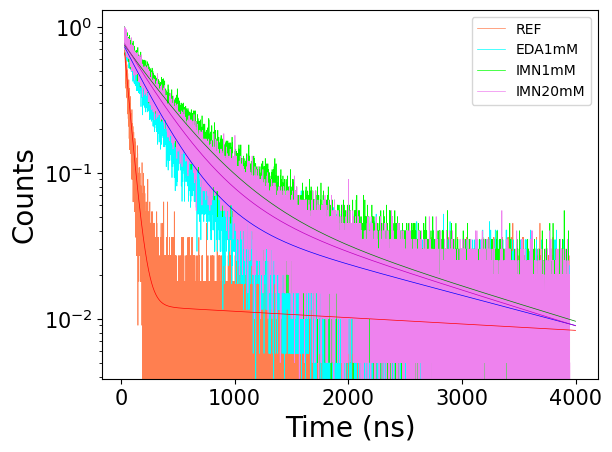

[145.95997288591934, 400.3419471936566, 524.7209187316635, 459.1478717575107]


In [20]:
M2refTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/M2_ref_eda1mM_Imn1mM_imn20mM_250KHz_256ps_1pcint.txt', names=['Count1','Count2','Count3','Count4'], skiprows = 10 ,delimiter='	',index_col=False)
M2refTRPL1 = pd.concat([Timex,M1refTRPL], axis =1)

Time3 = M2refTRPL1.iloc[:,0].astype(np.int64) 
fixedM2refTRPL1 = M2refTRPL1.drop(M2refTRPL1.index[range(M2refTRPL1['Count1'].idxmax())])
fixedM2refTRPL1.columns = ['Time3', 'Count1','Count2','Count3','Count4']  

M1refTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/M1_ref_eda1mM_Imn1mM_eda20mM_250KHz_256ps_1pcint.txt', names=['Count1','Count2','Count3','Count4'], skiprows = 10 ,delimiter='	',index_col=False)
M1refTRPL1 = pd.concat([Timex,M1refTRPL], axis =1)
Time2 = M1refTRPL1.iloc[:,0].astype(np.int64) 
fixedM1refTRPL1 = M1refTRPL1.drop(M1refTRPL1.index[range(M1refTRPL1['Count1'].idxmax())])
fixedM1refTRPL1.columns = ['Time2', 'Count1','Count2','Count3','Count4'] 

M2tau1 = []
M2tau2 = []
M2tauavg = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','EDA1mM','IMN1mM','IMN20mM']
for i in range(1,5):
    plt.plot(fixedM2refTRPL1['Time3'].values , fixedM2refTRPL1['Count'+str(i)].values/np.max(fixedM2refTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    biexp_Count= double_exp_fit(fixedM2refTRPL1['Count'+str(i)].values/np.max(fixedM2refTRPL1['Count'+str(i)].values),fixedM2refTRPL1['Time3'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(fixedM2refTRPL1['Time3'].values, biexp_Count[5], colors2[i-1])
    plt.legend()
    M2tau1.append(biexp_Count[0])
    M2tau2.append(biexp_Count[2])
    M2tauavg.append(biexp_Count[4])
plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()
print(M2tauavg)

In [21]:
tauavg_df = pd.DataFrame({'J1Tauavg': J1tauavg, 
                       'J2Tauavg': J2tauavg,
                       'M1Tauavg': M1tauavg,
                       'M2Tauavg': M2tauavg}, 
                  index=list('ABCD'))

print(tauavg_df)
#df_lists = tau1_df[['J1Tau1','J2Tau1', 'M1Tau1', 'M2Tau1']].unstack().apply(pd.Series)
#df_lists.plot.bar(rot=0, cmap=plt.cm.jet, fontsize=8, width=0.7, figsize=(8,4))

     J1Tauavg    J2Tauavg    M1Tauavg    M2Tauavg
A  325.939441  191.891386  142.937036  145.959973
B  466.691033  382.533185  401.376473  400.341947
C  360.299223  390.442490  511.732891  524.720919
D  328.878871  363.716673  463.098936  459.147872


In [22]:
boxplot_df1= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/02-07-2023Br25_EDA_IMN_boxplot.csv',index_col=False)
print(boxplot_df1)
boxplot_df= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/02-07-2023Br25_EDA_IMN_boxplot.csv',index_col=False).values
df = boxplot_df[0:5,1:5]
print(df)
besttauavg_array = np.array([[319.666088],[467.394327],[368.453326],[462.261363],[376.642011]])
besttauavg_df = pd.DataFrame(besttauavg_array, 
                            index = ['Control','EDA 1mM', 'IMN 1mM', 'EDA 20mM', 'IMN 20mM'],
                            columns  = ['Best Results'])

print(besttauavg_df)

  Unnamed: 0    J1TauAvg    J2TauAvg    M1TauAvg    M2TauAvg
0  Reference  319.666088  191.831982  134.190682  136.739484
1    EDA 1mM  467.394327  368.401217  402.432857  198.020603
2    IMN 1mM  359.152603  368.453326  517.526704  234.401240
3   EDA 20mM  326.391879         NaN  462.261363         NaN
4   IMN 20mM         NaN  376.642011         NaN  372.379379
[[319.666088 191.831982 134.190682 136.739484]
 [467.394327 368.401217 402.432857 198.020603]
 [359.152603 368.453326 517.526704 234.40124]
 [326.391879 nan 462.261363 nan]
 [nan 376.642011 nan 372.379379]]
          Best Results
Control     319.666088
EDA 1mM     467.394327
IMN 1mM     368.453326
EDA 20mM    462.261363
IMN 20mM    376.642011


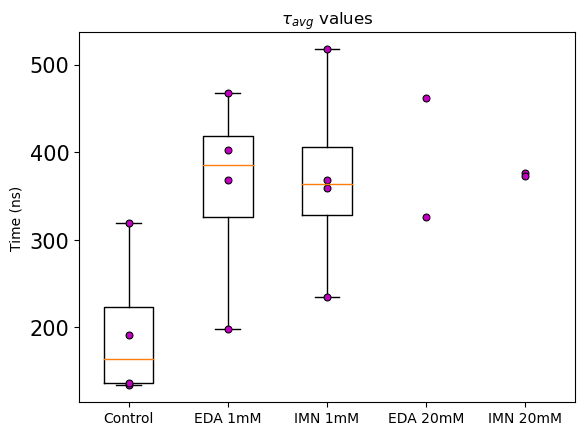

In [23]:
fig, ax = plt.subplots()
ax.boxplot(df.transpose())
plt.plot([1,2,3,4,5],df, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["Control", "EDA 1mM", "IMN 1mM", "EDA 20mM","IMN 20mM" ], fontsize = 10)
plt.title(r"$\tau_{avg}$ values")
plt.ylabel("Time (ns)")
plt.show()

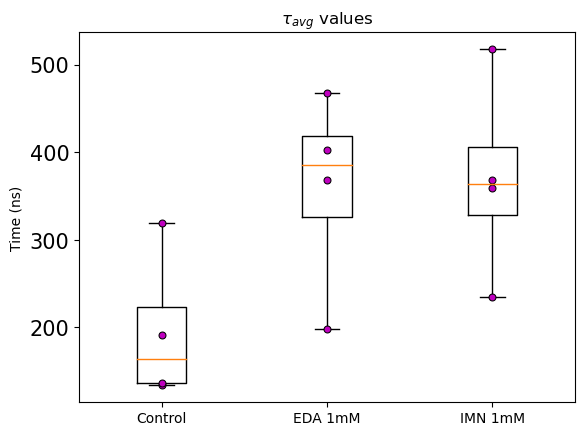

In [24]:
df1 = boxplot_df[0:3,1:5]
fig, ax = plt.subplots()
ax.boxplot(df1.transpose())
plt.plot([1,2,3],df1, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["Control", "EDA 1mM", "IMN 1mM"], fontsize = 10)
plt.title(r"$\tau_{avg}$ values")
plt.ylabel("Time (ns)")
plt.show()

In [25]:
#take all best tauavg values for each sample and input into dataframe for bi exponential fit

/Users/julisajuarez/functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


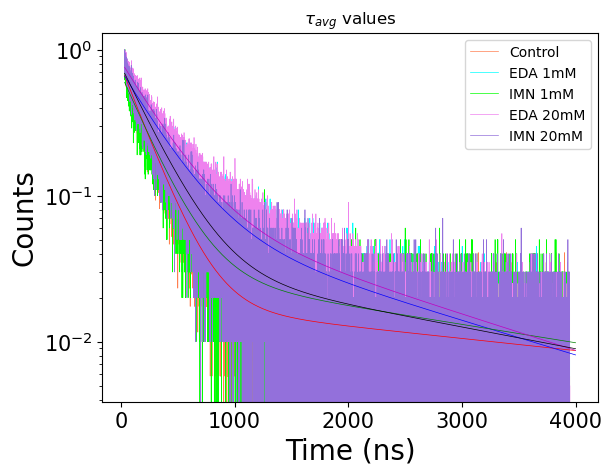

In [26]:
besttauavg_array = np.array([[319.666088],[467.394327],[368.453326],[462.261363],[376.642011]])
bestdatadf = pd.DataFrame(besttauavg_array, 
                            index = ['Control','EDA 1mM', 'IMN 1mM', 'EDA 20mM', 'IMN 20mM'],
                            columns  = ['Best Results'])

control_best = J1refTRPL1['Count1']
EDA1_best = J1refTRPL1['Count2']
IMN1_best = J2refTRPL1['Count3']
EDA20_best = M1refTRPL1['Count4']
IMN20_best = J2refTRPL1['Count2']

besttauavg = pd.concat([Timex,control_best, EDA1_best, IMN1_best, EDA20_best, IMN20_best], axis =1)
besttauavg_df = besttauavg.drop(besttauavg.index[range(besttauavg['Count1'].idxmax())])
Timee = besttauavg_df.iloc[:,0].astype(np.int64)

besttauavg_df.columns = ['Timee', 'Count1','Count2', 'Count3', 'Count4', 'Count5']  

#time to plot
colors = ['coral','cyan','lime','violet', 'mediumpurple']
colors2 = ['r','b','g','m','k']
C = ['Control','EDA 1mM', 'IMN 1mM', 'EDA 20mM', 'IMN 20mM']
for i in range(1,6):
    plt.plot(besttauavg_df['Timee'].values , besttauavg_df['Count'+str(i)].values/np.max(besttauavg_df['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,6):
    biexp_Count= double_exp_fit(besttauavg_df['Count'+str(i)].values/np.max(besttauavg_df['Count'+str(i)].values),besttauavg_df['Timee'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(besttauavg_df['Timee'].values, biexp_Count[5], colors2[i-1])
    plt.legend()

plt.yscale('log')
plt.title(r"$\tau_{avg}$ values")
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()



**DATA SET 02/07/2023**: *Stretched Exponential*


In [27]:
stretchexp_Count = stretch_exp_fit(fixedJ1refTRPL1['Count1'].values/np.max(fixedJ1refTRPL1['Count1'].values), fixedJ1refTRPL1['Time'].values, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1.5))
print(stretchexp_Count)

/Users/julisajuarez/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(1.843305827619134e-06, 0.8742567436976434, 0.8383436182853845, 1.971604958735583e-06, array([0., 0., 0., ..., 0., 0., 0.]))


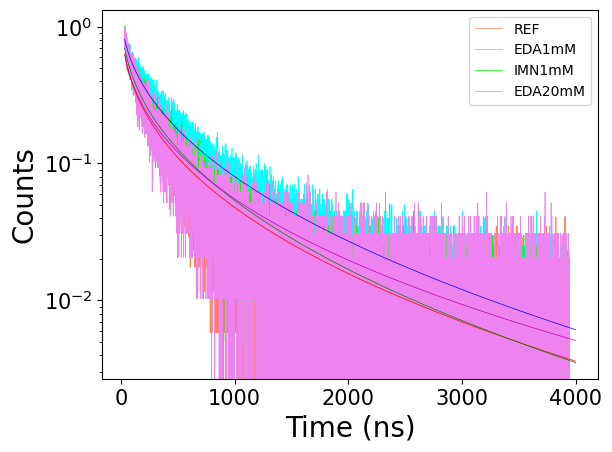

In [28]:
J1strTRPL1 = pd.concat([Timex,J1refTRPL], axis =1)
Time = J1strTRPL1.iloc[:,0].astype(np.int64) #calls and converts Timex from float to int
fixedJ1strTRPL1 = J1strTRPL1.drop(J1strTRPL1.index[range(J1strTRPL1['Count1'].idxmax())])
fixedJ1strTRPL1.columns = ['Time', 'Count1','Count2','Count3','Count4']

J1beta_stretch = []
J1tauavg_stretch = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','EDA1mM','IMN1mM','EDA20mM']
for i in range(1,5):
    plt.plot(fixedJ1strTRPL1['Time'].values , fixedJ1strTRPL1['Count'+str(i)].values/np.max(fixedJ1strTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    stretchexp_Count = stretch_exp_fit(fixedJ1strTRPL1['Count'+str(i)].values/np.max(fixedJ1strTRPL1['Count'+str(i)].values), fixedJ1strTRPL1['Time'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))#for Tc- remeber that my data is already in nanoseconds (no need to convert *E-9)  
    plt.plot(fixedJ1strTRPL1['Time'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()
    J1beta_stretch.append(stretchexp_Count[1])
    J1tauavg_stretch.append(stretchexp_Count[3])

plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()

/Users/julisajuarez/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


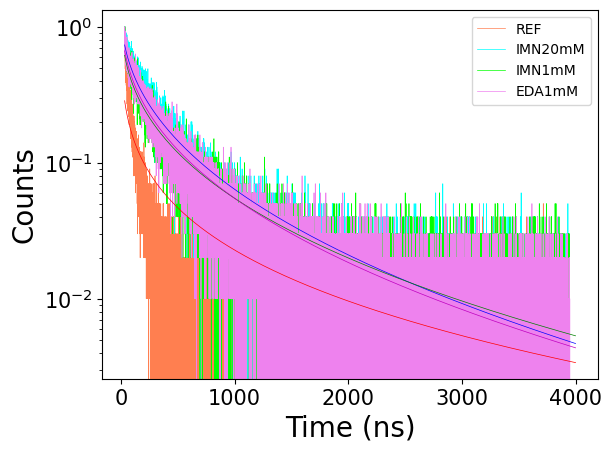

In [29]:
J2strTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/J2_ref_imn20mM_Imn1mM_eda1mM_250KHz_256ps_1pcint.txt', names=['Count1','Count2','Count3','Count4'], skiprows = 10 ,delimiter='	',index_col=False)
J2strTRPL1 = pd.concat([Timex,J2strTRPL], axis =1)
Time1 = J2refTRPL1.iloc[:,0].astype(np.int64) 
fixedJ2strTRPL1 = J2strTRPL1.drop(J2strTRPL1.index[range(J2strTRPL1['Count1'].idxmax())])
fixedJ2strTRPL1.columns = ['Time1', 'Count1','Count2','Count3','Count4']   

J2beta_stretch = []
J2tauavg_stretch = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','IMN20mM','IMN1mM','EDA1mM']
for i in range(1,5):
    plt.plot(fixedJ2strTRPL1['Time1'].values , fixedJ2strTRPL1['Count'+str(i)].values/np.max(fixedJ2strTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    stretchexp_Count = stretch_exp_fit(fixedJ2strTRPL1['Count'+str(i)].values/np.max(fixedJ2strTRPL1['Count'+str(i)].values), fixedJ2refTRPL1['Time1'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))  
    plt.plot(fixedJ2strTRPL1['Time1'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()
    J2beta_stretch.append(stretchexp_Count[1])
    J2tauavg_stretch.append(stretchexp_Count[3])

plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()

/Users/julisajuarez/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


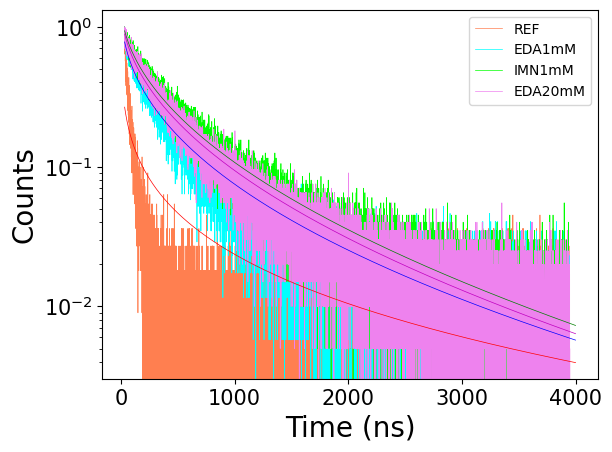

In [30]:
M1strTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/M1_ref_eda1mM_Imn1mM_eda20mM_250KHz_256ps_1pcint.txt', names=['Count1','Count2','Count3','Count4'], skiprows = 10 ,delimiter='	',index_col=False)
M1strTRPL1 = pd.concat([Timex,M1strTRPL], axis =1)
Time2 = M1strTRPL1.iloc[:,0].astype(np.int64) 
fixedM1strTRPL1 = M1refTRPL1.drop(M1strTRPL1.index[range(M1strTRPL1['Count1'].idxmax())])
fixedM1strTRPL1.columns = ['Time2', 'Count1','Count2','Count3','Count4'] 

M1beta_stretch = []
M1tauavg_stretch = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','EDA1mM','IMN1mM','EDA20mM']
for i in range(1,5):
    plt.plot(fixedM1strTRPL1['Time2'].values , fixedM1strTRPL1['Count'+str(i)].values/np.max(fixedM1strTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    stretchexp_Count = stretch_exp_fit(fixedM1strTRPL1['Count'+str(i)].values/np.max(fixedM1strTRPL1['Count'+str(i)].values), fixedM1refTRPL1['Time2'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))  
    plt.plot(fixedM1strTRPL1['Time2'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()
    M1beta_stretch.append(stretchexp_Count[1])
    M1tauavg_stretch.append(stretchexp_Count[3])

plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()


/Users/julisajuarez/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


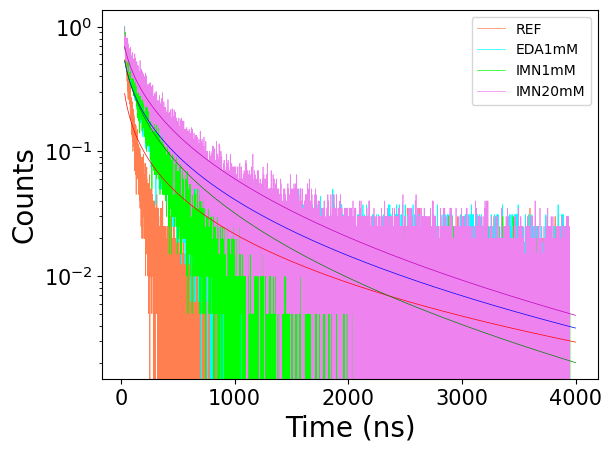

In [31]:
M2strTRPL= pd.read_csv('~/Desktop/TRPL:Lifetime Data/02_07_2023_eda_imn_surface/M2_ref_eda1mM_Imn1mM_imn20mM_250KHz_256ps_1pcint.txt', names=['Count1','Count2','Count3','Count4'], skiprows = 10 ,delimiter='	',index_col=False)
M2strTRPL1 = pd.concat([Timex,M2strTRPL], axis =1)
Time3 = M2strTRPL1.iloc[:,0].astype(np.int64) 
fixedM2strTRPL1 = M2strTRPL1.drop(M2strTRPL1.index[range(M2strTRPL1['Count1'].idxmax())])
fixedM2strTRPL1.columns = ['Time3', 'Count1','Count2','Count3','Count4']  

M2beta_stretch = []
M2tauavg_stretch = []
colors = ['coral','cyan','lime','violet']
colors2 = ['r','b','g','m']
C = ['REF','EDA1mM','IMN1mM','IMN20mM']

for i in range(1,5):
    plt.plot(fixedM2strTRPL1['Time3'].values , fixedM2strTRPL1['Count'+str(i)].values/np.max(fixedM2strTRPL1['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,5):
    stretchexp_Count = stretch_exp_fit(fixedM2strTRPL1['Count'+str(i)].values/np.max(fixedM2strTRPL1['Count'+str(i)].values), fixedM2strTRPL1['Time3'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))  
    plt.plot(fixedM2strTRPL1['Time3'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()
    M2beta_stretch.append(stretchexp_Count[1])
    M2tauavg_stretch.append(stretchexp_Count[3])

plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()

In [32]:
tauavg_stretch_df = pd.DataFrame({'J1Tauavg': J1tauavg_stretch, 
                       'J2Tauavg': J2tauavg_stretch,
                       'M1Tauavg': M1tauavg_stretch,
                       'M2Tauavg': M2tauavg_stretch}, 
                  index=list('ABCD'))

beta_stretch_df = pd.DataFrame({'J1Tauavg': J1beta_stretch, 
                       'J2Tauavg': J2beta_stretch,
                       'M1Tauavg': M1beta_stretch,
                       'M2Tauavg': M2beta_stretch}, 
                  index=list('ABCD'))

print(tauavg_stretch_df)
print(beta_stretch_df)

     J1Tauavg    J2Tauavg    M1Tauavg    M2Tauavg
A  151.255410   77.183727   80.102855   74.386411
B  228.401125  190.431740  215.881782  131.129335
C  168.661125  165.257892  287.862837  112.868506
D  167.066842  167.728717  259.132930  181.084200
   J1Tauavg  J2Tauavg  M1Tauavg  M2Tauavg
A  0.404023  0.270621  0.257777  0.279080
B  0.455623  0.434525  0.446403  0.365829
C  0.432294  0.384029  0.506415  0.390521
D  0.392014  0.409777  0.488750  0.418049


In [33]:
tauavg_stretch_df = pd.DataFrame({'J1Tauavg': J1tauavg_stretch, 
                       'J2Tauavg': J2tauavg_stretch,
                       'M1Tauavg': M1tauavg_stretch,
                       'M2Tauavg': M2tauavg_stretch}, 
                  index=list('ABCD')).values

beta_stretch_df = pd.DataFrame({'J1Tauavg': J1beta_stretch, 
                       'J2Tauavg': J2beta_stretch,
                       'M1Tauavg': M1beta_stretch,
                       'M2Tauavg': M2beta_stretch}, 
                  index=list('ABCD')).values


In [34]:
tauavg_stretch_array = np.array([[152.461456, 77.573607,81.598782,74.683675],[228.186781,167.205634,216.641618,131.174497],[168.661272,164.635074,290.019517,113.251691],[166.312274,math.nan,258.611945,math.nan],[math.nan,190.679552,math.nan,180.397717]])
besttauavg_stretch_df = pd.DataFrame(tauavg_stretch_array, 
                            index = ['Control','EDA 1mM', 'IMN 1mM', 'EDA 20mM', 'IMN 20mM'],
                            columns  = ['J1','J2','M1','M3'])

beta_stretch_array = np.array([[0.407477,0.272181,0.257178,0.279513],[0.454994,0.408141,0.448463, 0.365983],[0.432294,0.381889,0.507214,0.391746],[0.389548,math.nan,0.487406, math.nan],[math.nan,0.435203,math.nan,0.415940]])
bestbeta_stretch_df = pd.DataFrame(beta_stretch_array, 
                            index = ['Control','EDA 1mM', 'IMN 1mM', 'EDA 20mM', 'IMN 20mM'],
                            columns  = ['J1','J2','M1','M3'])

print(tauavg_stretch_array)
#stretch factor related to heterogeneity of sample 0or1? = homogen...

[[152.461456  77.573607  81.598782  74.683675]
 [228.186781 167.205634 216.641618 131.174497]
 [168.661272 164.635074 290.019517 113.251691]
 [166.312274        nan 258.611945        nan]
 [       nan 190.679552        nan 180.397717]]


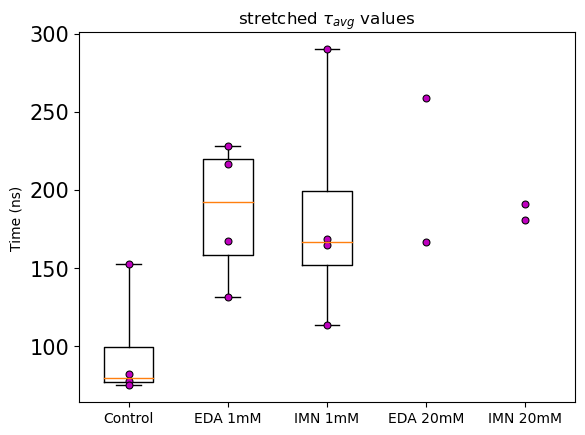

In [35]:
fig, ax1 = plt.subplots()
ax1.boxplot(tauavg_stretch_array.transpose(), whis=(0,100))
plt.plot([1,2,3,4,5],tauavg_stretch_array, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax1.set_xticklabels(["Control", "EDA 1mM", "IMN 1mM", "EDA 20mM","IMN 20mM" ], fontsize = 10)
plt.title(r"stretched $\tau_{avg}$ values")
plt.ylabel("Time (ns)")
plt.show()

[[152.461456  77.573607  81.598782  74.683675]
 [228.186781 167.205634 216.641618 131.174497]
 [168.661272 164.635074 290.019517 113.251691]]


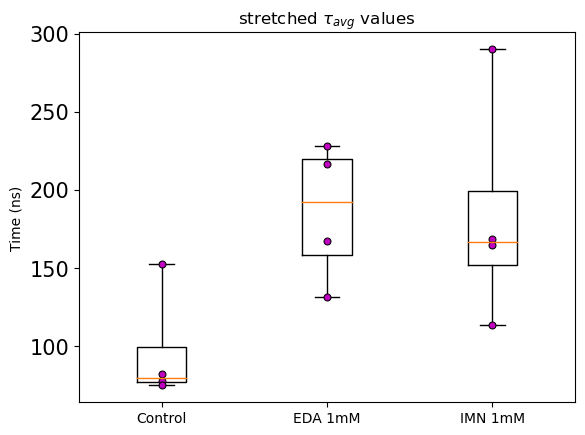

In [36]:
boxplotstr = tauavg_stretch_array[0:3,0:5]
print(boxplotstr)
fig, ax1 = plt.subplots()
ax1.boxplot(boxplotstr.transpose(), whis=(0,100))
plt.plot([1,2,3],boxplotstr, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax1.set_xticklabels(["Control", "EDA 1mM", "IMN 1mM"], fontsize = 10)
plt.title(r"stretched $\tau_{avg}$ values")
plt.ylabel("Time (ns)")
plt.show()

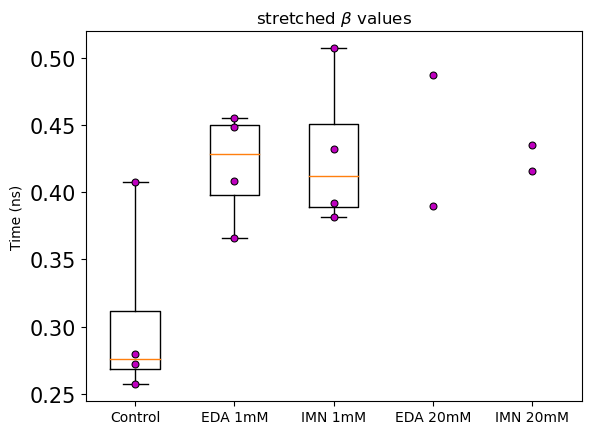

In [37]:
fig, ax2 = plt.subplots()
ax2.boxplot(beta_stretch_array.transpose(), whis=(0,100))
plt.plot([1,2,3,4,5],beta_stretch_array, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax2.set_xticklabels(["Control", "EDA 1mM", "IMN 1mM", "EDA 20mM","IMN 20mM" ], fontsize = 10)
plt.title(r"stretched $\beta$ values")
plt.ylabel("Time (ns)")
plt.show()

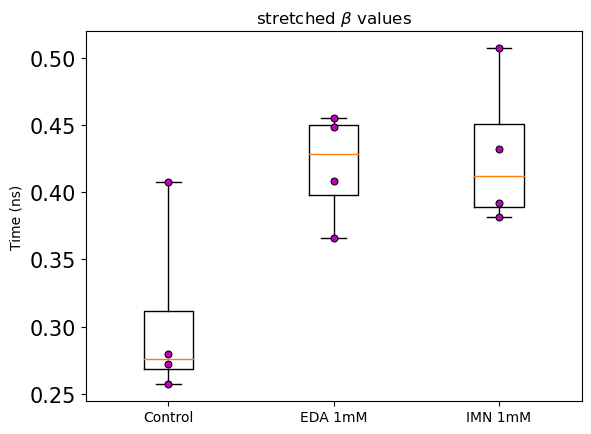

In [38]:
boxplot_betastr = beta_stretch_array[0:3, 0:5]
fig, ax2 = plt.subplots()
ax2.boxplot(boxplot_betastr.transpose(), whis=(0,100))
plt.plot([1,2,3],boxplot_betastr, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax2.set_xticklabels(["Control", "EDA 1mM", "IMN 1mM"], fontsize = 10)
plt.title(r"stretched $\beta$ values")
plt.ylabel("Time (ns)")
plt.show()

In [39]:
print(besttauavg_stretch_df)
print(bestbeta_stretch_df)


                  J1          J2          M1          M3
Control   152.461456   77.573607   81.598782   74.683675
EDA 1mM   228.186781  167.205634  216.641618  131.174497
IMN 1mM   168.661272  164.635074  290.019517  113.251691
EDA 20mM  166.312274         NaN  258.611945         NaN
IMN 20mM         NaN  190.679552         NaN  180.397717
                J1        J2        M1        M3
Control   0.407477  0.272181  0.257178  0.279513
EDA 1mM   0.454994  0.408141  0.448463  0.365983
IMN 1mM   0.432294  0.381889  0.507214  0.391746
EDA 20mM  0.389548       NaN  0.487406       NaN
IMN 20mM       NaN  0.435203       NaN  0.415940


/Users/julisajuarez/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


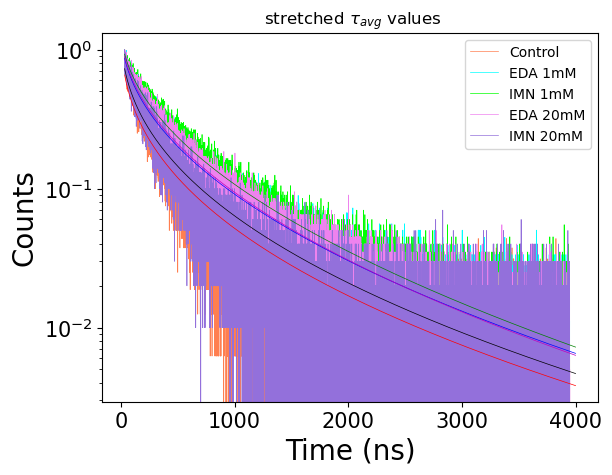

In [40]:
#imn1 and eda20 are messed up :(

staucontrol_best = fixedJ1strTRPL1['Count1']
stauEDA1_best = fixedJ1strTRPL1['Count2']
stauIMN1_best = fixedM1strTRPL1['Count3']
stauEDA20_best = fixedM1strTRPL1['Count4']
stauIMN20_best = fixedJ2strTRPL1['Count2']


beststauavg = pd.concat([Timex,staucontrol_best, stauEDA1_best, stauIMN1_best, stauEDA20_best, stauIMN20_best], axis =1)
beststauavg_df = beststauavg.drop(beststauavg.index[range(beststauavg['Count4'].idxmax())])
Timeee= beststauavg_df.iloc[:,0].astype(np.int64)
beststauavg_df.columns = ['Timeee', 'Count1','Count2', 'Count3', 'Count4', 'Count5']  

#time to plot
colors = ['coral','cyan','lime','violet', 'mediumpurple']
colors2 = ['r','b','g','m','k']
C = ['Control','EDA 1mM', 'IMN 1mM', 'EDA 20mM', 'IMN 20mM']
for i in range(1,6):
    plt.plot(beststauavg_df['Timeee'].values , beststauavg_df['Count'+str(i)].values/np.max(beststauavg_df['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,6):
    stretchexp_Count = stretch_exp_fit(beststauavg_df['Count'+str(i)].values/np.max(beststauavg_df['Count'+str(i)].values), beststauavg_df['Timeee'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))  
    plt.plot(beststauavg_df['Timeee'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()

plt.yscale('log')
plt.title(r" stretched $\tau_{avg}$ values")
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()

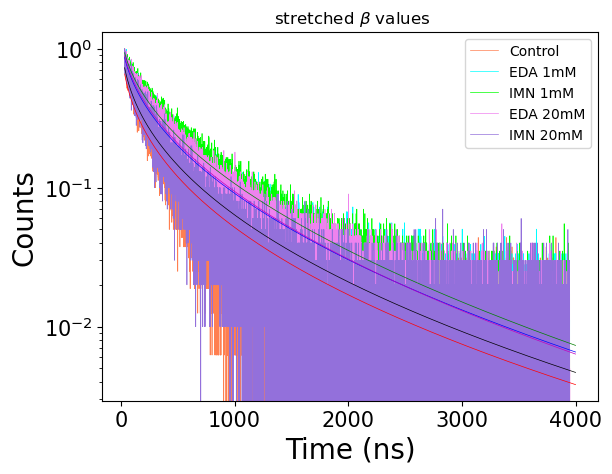

In [41]:
sbetacontrol_best = fixedJ1strTRPL1['Count1']
sbetaEDA1_best = fixedJ1strTRPL1['Count2']
sbetaIMN1_best = fixedM1strTRPL1['Count3']
sbetaEDA20_best = fixedM1strTRPL1['Count4']
sbetaIMN20_best = fixedJ2strTRPL1['Count2']

bestsbeta = pd.concat([Timex,sbetacontrol_best, sbetaEDA1_best, sbetaIMN1_best, sbetaEDA20_best, sbetaIMN20_best], axis =1)
bestsbeta_df = bestsbeta.drop(bestsbeta.index[range(bestsbeta['Count4'].idxmax())])
Timeeee= bestsbeta_df.iloc[:,0].astype(np.int64)
bestsbeta_df.columns = ['Timeeee', 'Count1','Count2', 'Count3', 'Count4', 'Count5']  

#time to plot
colors = ['coral','cyan','lime','violet', 'mediumpurple']
colors2 = ['r','b','g','m','k']
C = ['Control','EDA 1mM', 'IMN 1mM', 'EDA 20mM', 'IMN 20mM']
for i in range(1,6):
    plt.plot(bestsbeta_df['Timeeee'].values , bestsbeta_df['Count'+str(i)].values/np.max(bestsbeta_df['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,6):
    stretchexp_Count = stretch_exp_fit(bestsbeta_df['Count'+str(i)].values/np.max(bestsbeta_df['Count'+str(i)].values), bestsbeta_df['Timeeee'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))  
    plt.plot(bestsbeta_df['Timeeee'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()

plt.yscale('log')
plt.title(r" stretched $\beta$ values")
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.show()

/Users/julisajuarez/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:39: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


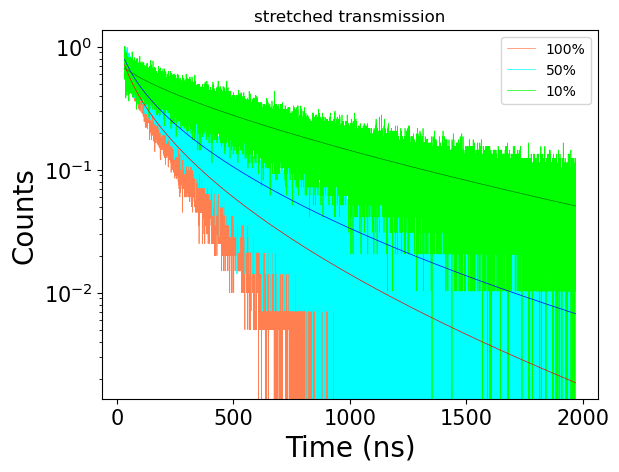

In [42]:
TRPLT = pd.read_csv('~/Desktop/TRPL:Lifetime Data/03_10_2023/500kHz_32ps_REF_100%T_50%T_10%T_1.2M_640nm_0-1970ns.txt', names=['Count1','Count2','Count3'], skiprows = 10 ,delimiter='	',index_col=False)
Timexx=pd.Series(np.arange(0,2000,0.032))
TRPLTr = pd.concat([Timexx,TRPLT], axis =1)
trtime = TRPLTr.iloc[:,0].astype(np.int64)
TRPLTra = TRPLTr.drop(TRPLTr.index[range(TRPLTr['Count1'].idxmax())])
TRPLTran = TRPLTra.dropna()
TRPLTran.columns = ['trtime', 'Count1','Count2','Count3']  

colors = ['coral','cyan','lime']
colors2 = ['r','b','g']
C = ['100%','50%','10%']

for i in range(1,4):
    plt.plot(TRPLTran['trtime'].values , TRPLTran['Count'+str(i)].values/np.max(TRPLTran['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,4):
    stretchexp_Count = stretch_exp_fit(TRPLTran['Count'+str(i)].values/np.max(TRPLTran['Count'+str(i)].values), TRPLTran['trtime'].values, Tc = (0,1e4), Beta = (0,1), A = (0,1.5))  
    plt.plot(TRPLTran['trtime'].values, stretchexp_Count[4], colors2[i-1])
    plt.legend()
    
plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.title(r"stretched transmission")
plt.show()

/Users/julisajuarez/functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: invalid value encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/functions.py:82: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/julisajuarez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/julisajuarez/functions.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))


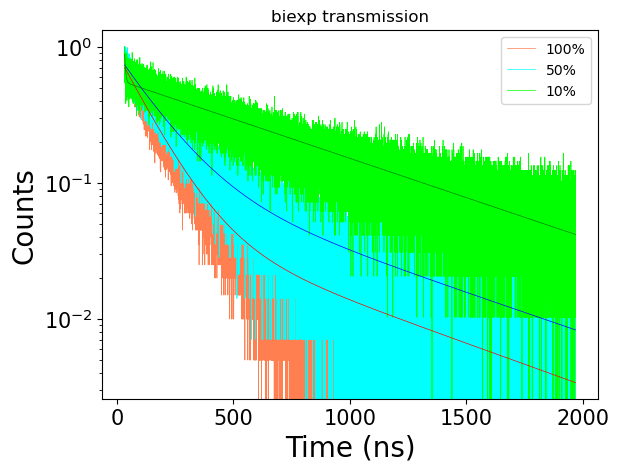

In [46]:
TRPLT = pd.read_csv('~/Desktop/TRPL:Lifetime Data/03_10_2023/500kHz_32ps_REF_100%T_50%T_10%T_1.2M_640nm_0-1970ns.txt', names=['Count1','Count2','Count3'], skiprows = 10 ,delimiter='	',index_col=False)
Timexx=pd.Series(np.arange(0,2000,0.032))
TRPLTr = pd.concat([Timexx,TRPLT], axis =1)
trtime = TRPLTr.iloc[:,0].astype(np.int64)
TRPLTra = TRPLTr.drop(TRPLTr.index[range(TRPLTr['Count1'].idxmax())])
TRPLTran = TRPLTra.dropna()
TRPLTran.columns = ['trtime', 'Count1','Count2','Count3']  

colors = ['coral','cyan','lime']
colors2 = ['r','b','g']
C = ['100%','50%','10%']

for i in range(1,4):
    plt.plot(TRPLTran['trtime'].values , TRPLTran['Count'+str(i)].values/np.max(TRPLTran['Count'+str(i)].values), label = C[i-1], c= colors[i-1])
for i in range(1,4):
    biexp_Count= double_exp_fit(TRPLTran['Count'+str(i)].values/np.max(TRPLTran['Count'+str(i)].values),TRPLTran['trtime'].values , tau1_bounds=(0,1000), a1_bounds=(0,1000), tau2_bounds=(0,10000), a2_bounds=(0,1000))
    plt.plot(TRPLTran['trtime'].values, biexp_Count[5], colors2[i-1])
    plt.legend()
    
plt.yscale('log')
plt.xlabel('Time (ns)',fontsize =  20)
plt.ylabel('Counts',fontsize =  20)
plt.title(r"biexp transmission")
plt.show()

In [44]:
M2beta_stretch.append(stretchexp_Count[1])
M2tauavg_stretch.append(stretchexp_Count[3])